# Szyfrowanie
###### autor: Jędrzej Wydra
_______________________________

Uruchom poniższą komórkę, aby przygotować środowisko Pythona

In [3]:
# @title Przygotowanie środowiska
import random
import math
import time
import matplotlib.pyplot as plt
import numpy as np
import time
from tqdm import tqdm

def rozklad_na_czynniki_pierwsze(x):
    czynniki = []
    dzielnik = 2

    while dzielnik * dzielnik <= x:
        while x % dzielnik == 0:
            czynniki.append(dzielnik)
            x //= dzielnik
        dzielnik += 1

    if x > 1:
        czynniki.append(x)

    return czynniki

def is_primitive_root(alpha, p, prime_factors):
    phi = p - 1
    for q in prime_factors:
        if pow(alpha, phi // q, p) == 1:
            return False
    return True

max_len = 3

Komórka "Własny tekst" umożliwia testowanie algorytmów z wykorzystaniem dowolnie wybranego tekstu. Komórka "Domyślny tekst" dostarcza przygotowany przez Autora przykład. Uruchom tylko jedną z nich.

In [ ]:
# @title Własny tekst
text = input('Podaj tekst do zaszyfrowania: ')
print('Tekst został wczytany.')

In [ ]:
# @title Domyślny tekst
text = 'informacja publiczna i ochrona danych osobowych'.upper()
print('Załadowany pomyślnie.')

Załadowany pomyślnie.


W pierwszej kolejności obejrzyjmy jak działa "naiwne" szyforwanie lub (jak również można to nazwać), kodowanie wiadomości za pomocą liczb.

In [ ]:
# @title Szyfrowanie naiwne

print('____________________________________________________________________________________________________________________________')
print('\n')

text = 'informacja publiczna i ochrona danych osobowych'.upper()

text_split = list(set(list(text)))
random.shuffle(text_split)
number = [i + 10 for i in list(range(len(text_split)))]

key = dict(zip(text_split, number))

print('Informacja do zaszyfrowania: ' + text)
print('\n')
print('Klucz szyfrujący: ')
print('\n')

space = ' |  '

line1 = '|  '
for i in text_split:
  line1 += i + space
print(line1)

break_line = ''
for i in range(101):
  break_line += '-'

print(break_line)

space = ' | '

line2 = '| '
for i in number:
  line2 += str(i) + space
print(line2)

#####################

encrypted_text = ''
for i in text:
  encrypted_text += str(key[i]) + '-'

prep_to_encrypt = encrypted_text[:-1]

n_seg = 0
for i in prep_to_encrypt.split('-'):
  if len(i) > n_seg:
    n_seg = len(i)

print('\n')
print('Informacja zaszyfrowana: ' + prep_to_encrypt)

print('____________________________________________________________________________________________________________________________')
print('\n')

____________________________________________________________________________________________________________________________


Informacja do zaszyfrowania: INFORMACJA PUBLICZNA I OCHRONA DANYCH OSOBOWYCH


Klucz szyfrujący: 


|  R |  B |  S |  W |  H |    |  I |  C |  Y |  D |  O |  J |  N |  F |  A |  P |  Z |  U |  M |  L |  
-----------------------------------------------------------------------------------------------------
| 10 | 11 | 12 | 13 | 14 | 15 | 16 | 17 | 18 | 19 | 20 | 21 | 22 | 23 | 24 | 25 | 26 | 27 | 28 | 29 | 


Informacja zaszyfrowana: 16-22-23-20-10-28-24-17-21-24-15-25-27-11-29-16-17-26-22-24-15-16-15-20-17-14-10-20-22-24-15-19-24-22-18-17-14-15-20-12-20-11-20-13-18-17-14
____________________________________________________________________________________________________________________________




Komórka "Domyślne dane" załaduje dane, które wygenerują klucze do szyforwania, które wymyślił autor. Gdy pierwszy raz korzystasz z tego notatnika zalecam uruchomić właśnie tę komórkę, aby zoaczyć o co chodzi. Komórka "Własne dane" umożliwa wygenerowanie kluczy według własnego pomysłu.

In [ ]:
# @title Domyślne dane

P = 23
a = 4
b = 5

print('Dane załadowane pomyślnie.')

Dane załadowane pomyślnie.


In [ ]:
# @title Własne dane

a = input('Tajna liczba osoby A: ')
b = input('Tajna liczba osoby B: ')
P = input('Jawna liczba P: ')

a = int(a)
b = int(b)
P = int(P)

print('Dane załadowane pomyślnie.')

Poniższa komórka generuje klucze na podstawie wyżej załadowanych danych.

In [ ]:
# @title Generowanie kluczy

print('____________________________________________________________________________________________________________________________')
print('\n')

print(f'Dwie osoby (A i B) wybierają jawnie pewną liczbę P. Niech tą liczbą będzie {P}.')
print('\n')
print(f'Osoba A wybiera teraz pewnien klucz a, np a = {a} i mnoży to przez P.')
print(f'Osoba B wybiera pewnien klucz b, np b = {b} i mnoży to przez P.')
print('\n')
print('Wówczas:')
print('\n')
print(f'Informacja publiczna: {P}')
print('\n')
print('Informacje, których nie trzeba ukrywać, ale trzeba przesłać:')
print(f'Osoba A: {P} * {a} = {a*P}')
print(f'Osoba B: {P} * {b} = {b*P}')
print('\n')
print(f'Tajna informacja osoby A: {a}')
print(f'Tajna informacja osoby B: {b}')
print('\n')
print(f'Klucz do szyfrowania: {a} * {b} * {P} = {a*b*P}')
print('\n')
print('\n')
print(f'Klucz publiczny osoby A: {P}-{a*P}')
print(f'Klucz publiczny osoby B: {P}-{b*P}')
print('\n')
print(f'Klucz prywatny osoby A: {a}')
print(f'Klucz prywatny osoby B: {b}')

print('____________________________________________________________________________________________________________________________')
print('\n')

____________________________________________________________________________________________________________________________


Dwie osoby (A i B) wybierają jawnie pewną liczbę P. Niech tą liczbą będzie 23.


Osoba A wybiera teraz pewnien klucz a, np a = 4 i mnoży to przez P.
Osoba B wybiera pewnien klucz b, np b = 5 i mnoży to przez P.


Wówczas:


Informacja publiczna: 23


Informacje, których nie trzeba ukrywać, ale trzeba przesłać:
Osoba A: 23 * 4 = 92
Osoba B: 23 * 5 = 115


Tajna informacja osoby A: 4
Tajna informacja osoby B: 5


Klucz do szyfrowania: 4 * 5 * 23 = 460




Klucz publiczny osoby A: 23-92
Klucz publiczny osoby B: 23-115


Klucz prywatny osoby A: 4
Klucz prywatny osoby B: 5
____________________________________________________________________________________________________________________________




Poniższa komórka szyfruje dane zgodnie z osłabionym protokołem Diffiego-Hellmanna. To tylko dydatktyczny przykład idei szyfrowania. Poprawna wersja protokołu jest zaprezentowana dalej, wraz z formalną definicją.

In [ ]:
# @title Szyfrowanie przez osobę B

print('____________________________________________________________________________________________________________________________')
print('\n')

public_key_a = input('Podaj klucz publiczny osoby A: ')
print('\n')
private_key_b = input('Podaj klucz prywatny osoby B: ')
print('\n')
encrypt = prep_to_encrypt.split('-')

encrypted_message = [str(int(i) + int(public_key_a.split('-')[1])*int(private_key_b)) for i in encrypt]
print('\n')
full_encrypted_message = ''
for i in encrypted_message:
  full_encrypted_message += i + '-'

full_encrypted_message = full_encrypted_message[:-1]
print('Zaszyfrowana wiadomość: ')
print(full_encrypted_message)

print('____________________________________________________________________________________________________________________________')
print('\n')

____________________________________________________________________________________________________________________________


Podaj klucz publiczny osoby A: 23-92


Podaj klucz prywatny osoby B: 5




Zaszyfrowana wiadomość: 
476-482-483-480-470-488-484-477-481-484-475-485-487-471-489-476-477-486-482-484-475-476-475-480-477-474-470-480-482-484-475-479-484-482-478-477-474-475-480-472-480-471-480-473-478-477-474
____________________________________________________________________________________________________________________________




Próba odkodowania zaszyfrowanej wiadomości. Gdy jakiś kod jest nieznany, to program zwraca "?". Tzn., kodowaliśmy zgodnie z kluczem szyfrującym szyfrowania naiwnego (kilka komórek wyżej). Jeśli w kodzie pojawia się liczba, której nie ma w tamtej tabeli, to program zwraca "?".

In [ ]:
# @title Pierwsza próba odczytu

print('____________________________________________________________________________________________________________________________')
print('\n')

un_key = dict(zip(number, text_split))

prep_to_decrypt = full_encrypted_message

message = ''
for i in prep_to_decrypt.split('-'):
  if int(i) in un_key.keys():
    message += un_key[int(i)]
  else:
    message += '?'

print('\n')
print('Odszyfrowana wiadomość: ' + message)

print('____________________________________________________________________________________________________________________________')
print('\n')

____________________________________________________________________________________________________________________________




Odszyfrowana wiadomość: ???????????????????????????????????????????????
____________________________________________________________________________________________________________________________




Odszyfrowywanie wiadomości na podstawie kluczy, aby wrócić do pierwotnego kodu wiadomości.

In [ ]:
# @title Odszyfrowanie przez osobę A

print('____________________________________________________________________________________________________________________________')
print('\n')

public_key_b = input('Podaj klucz publiczny osoby B: ')
print('\n')
private_key_a = input('Podaj klucz prywatny osoby A: ')
print('\n')
encrypt = full_encrypted_message.split('-')

decrypted_message = [str(int(i) - int(public_key_b.split('-')[1])*int(private_key_a)) for i in encrypt]
print('\n')
full_decrypted_message = ''
for i in decrypted_message:
  full_decrypted_message += i + '-'

full_decrypted_message = full_decrypted_message[:-1]
print('Odszyfrowana wiadomość: ')
print(full_decrypted_message)

print('____________________________________________________________________________________________________________________________')
print('\n')

____________________________________________________________________________________________________________________________


Podaj klucz publiczny osoby B: 23-115


Podaj klucz prywatny osoby A: 4




Odszyfrowana wiadomość: 
16-22-23-20-10-28-24-17-21-24-15-25-27-11-29-16-17-26-22-24-15-16-15-20-17-14-10-20-22-24-15-19-24-22-18-17-14-15-20-12-20-11-20-13-18-17-14
____________________________________________________________________________________________________________________________




In [ ]:
# @title Druga próba odczytu

print('____________________________________________________________________________________________________________________________')
print('\n')

prep_to_decrypt = full_decrypted_message

message = ''
for i in prep_to_decrypt.split('-'):
  if int(i) in un_key.keys():
    message += un_key[int(i)]
  else:
    message += '?'

print('\n')
print('Odszyfrowana wiadomość: ' + message)

print('____________________________________________________________________________________________________________________________')
print('\n')

____________________________________________________________________________________________________________________________




Odszyfrowana wiadomość: INFORMACJA PUBLICZNA I OCHRONA DANYCH OSOBOWYCH
____________________________________________________________________________________________________________________________




In [ ]:
# @title Łamanie kodu przy znajomości kluczy publicznych

print('____________________________________________________________________________________________________________________________')
print('\n')

start = time.time()

print('Klucz publiczy osoby A: ' + public_key_a)

print('Klucz publiczy osoby B: ' + public_key_b)
print('\n')
print('Stąd:')
l1 = [int(i) for i in public_key_a.split('-')]
l2 = [int(i) for i in public_key_b.split('-')]

hacked_private_key_a = int(l1[1]/l1[0])
hacked_private_key_b = int(l2[1]/l2[0])

print('Klucz prywatny osoby A: ' + str(hacked_private_key_a))
print('Klucz prywatny osoby B: ' + str(hacked_private_key_b))

end = time.time()

check = end - start

print('\n')
print('Czas łamania kodu: ' + str(end - start) + ' s.')

print('____________________________________________________________________________________________________________________________')
print('\n')

____________________________________________________________________________________________________________________________


Klucz publiczy osoby A: 23-92
Klucz publiczy osoby B: 23-115


Stąd:
Klucz prywatny osoby A: 4
Klucz prywatny osoby B: 5


Czas łamania kodu: 0.0004892349243164062 s.
____________________________________________________________________________________________________________________________




### A gdyby tak działanie nie było takie proste?

#### **Definicja 1. (grupa)**
Niech $G$ będzie pewnym zbiorem, a $ * : G \times G \rightarrow G$ pewnym działaniem na zbiorze $G$.
Parę $(G, *)$ nazwiemy grupą, gdy:

1) Dla każdego $a, b, c \in G$
$$
(a * b) * c = a * (b * c)
$$

2) Istnieje taki element $ e \in G $, że dla każdego $a \in G$
$$
a * e = e * a = a
$$

3) Dla każdego $ a \in G $ istnieje element $ a^{-1} \in G $, taki że:
  $$
  a * a^{-1} = a^{-1} * a = e
  $$

Dodatkowo, jeśli:

4) Dla każdego $ a, b \in G$,
$$
a * b = b * a
$$

to grupę $(G, *)$ nazwiemy grupą abelową.

#### **Definicja 2. (rząd grupy)**
Liczbę elementów grupy skończonej nazwiemy rzędem grupy. Rząd grupy powinien być liczbą pierwszą.

#### **Definica 3. (generator grupy)**
Niech $(G, *)$ będzie grupą skończoną, element $g \in G$ nazwiemy generatorem grupy $G$, gdy
$$
G = \{g^{k} | k \in \mathbb{Z}\}.
$$

#### **Twierdzenie 1. (o istnieniu generatora)**
Niech $p$ będzie liczbą pierwszą, wówczas grupa $\mathbb{Z}_{p} = \{1, 2, ..., p - 1\}$ jest grupą cykliczną, czyli posiada generator $g\in \mathbb{Z}_p$.

#### **Małe Twierdzenie Fermata**
Niech $p$ będzie liczbą pierwszą oraz $ a \in \mathbb{Z}_{p}$, wówczas
$$
a^{-1} \equiv a^{p-2} \pmod{p}.
$$

#### **Protokół Diffiego-Hellmana**
Niech $(G, *)$ będzie grupą skończoną o rzędzie $p - 1$, gdzie $p$ jest liczbą pierwszą. Wspólne klucze ustala się w następujących krokach:
1. Publiczne ustalenie liczby $p$ i wybór generatora $g$ grupy $G$;
2. Osoba $A$ ustala klucz prywatny $a$ i przekazuje osobie $B$ klucz publiczny $g^{a}$ (jako element grupy $G$);
3. Osoba $B$ ustala klucz prywatny $b$ i przekazuje osobie $A$ klucz publiczny $g^{b}$ (jako element grupy $G$);
4. Obie osoby niezależnie obliczają klucz szyfrujący $g^{ab}$ (jako element grupy $G$) na podstawie posiadanych informacji.

#### **Algorytm ElGamala**
Niech $(G, *)$ będzie grupą skończoną o rzędzie $p - 1$, gdzie $p$ jest liczbą pierwszą, $g$ jest generatorem grupy $G$, $a$ i $b$ są tajnymi informacjami odpowiednio osoby $A$ i $B$. Niech $1 < m < p$ będzie wiadomością.
1. Nadawca $A$ wybiera losową liczbę $k$ i korzystając ze swojego klucza publicznego $g^{a}$ oblicza $g^{ak}$ oraz korzystając z klucza publicznego $g^{a}$ osoby $B$ oblicza $g^{abk}$ w grupie $G$;
2. Nadawca $A$ przekazuje odbiorcy $B$ szyfrogram $(g^{ak}, m * g^{abk})$;
3. Odbiorca $B$ korzystając z szyfrogramu i klucza prywatnego oblicza $g^{abk}$, a następnie $(g^{abk})^{-1}$;
4. Odbiorca $B$ poznaje wiadomość $m$ poprzez operację $m * g^{abk} * (g^{abk})^{-1} = m * e = m$.


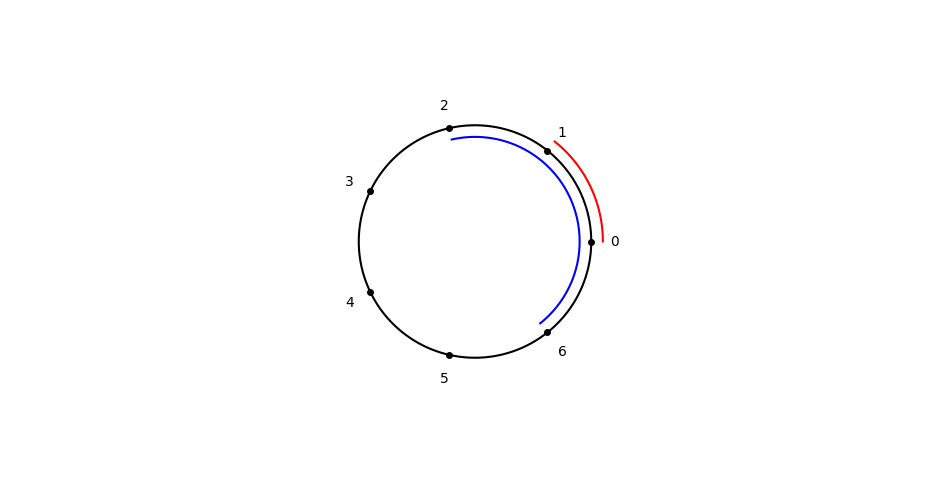

In [ ]:
# @title Grupa inna niż dodawanie na prostej rzeczywistej?

r = 1
center = (0, 1)
num_points = 7
#num_points = input('Liczba punktów: ')

theta_circle = np.linspace(0, 2 * np.pi, 300)
x_circle = center[0] + r * np.cos(theta_circle)
y_circle = center[1] + r * np.sin(theta_circle)

theta_circle_2 = np.linspace(0, (2 * np.pi) / num_points, 300)
x_circle_2 = center[0] + 1.1 * r * np.cos(theta_circle_2)
y_circle_2 = center[1] + 1.1 * r * np.sin(theta_circle_2)

theta_circle_3 = np.linspace(-(2 * np.pi) / num_points, 2 * (2 * np.pi) / num_points, 300)
x_circle_3 = center[0] + 0.9 * r * np.cos(theta_circle_3)
y_circle_3 = center[1] + 0.9 * r * np.sin(theta_circle_3)

theta_points = np.linspace(0, 2 * np.pi, num_points, endpoint=False)
x_points = center[0] + r * np.cos(theta_points)
y_points = center[1] + r * np.sin(theta_points)

x_points_annots = center[0] + 1.2 * r * np.cos(theta_points)
y_points_annots = center[1] + 1.2 * r * np.sin(theta_points)

plt.figure(figsize=(12, 12))
plt.plot(x_circle, y_circle, color='black')
plt.plot(x_circle_2, y_circle_2, color='red')
plt.plot(x_circle_3, y_circle_3, color='blue')
#plt.plot([-5, 0, 5], [-0.5, -0.5, -0.5], color='black')
plt.plot(x_points, y_points, 'o', color='black', markersize=4)

for i, (x, y) in enumerate(zip(x_points_annots, y_points_annots)):
    plt.text(x, y, str(i), color='black', fontsize=10, ha='center', va='center')

plt.xlim(-4, 4)
plt.ylim(-1, 3)

plt.gca().set_aspect('equal', adjustable='box')
plt.axis('off')
plt.show()


In [ ]:
# @title Przygotowanie szyfrowania w grupie skończonej

print('____________________________________________________________________________________________________________________________')
print('\n')

print('Sugestia rzędu grupy przy segmentach czterelementowych: 10006')

prime_group = input('Podaj rząd grupy szyfrującej: ')
prime_group = str(int(prime_group) + 1)
print('\n')

stop_1 = True
stop_2 = True

while stop_1 | stop_2:
  while stop_1:
    if len(prime_group) < n_seg + 1:
      print(f'Rząd grupy szyfrującej powinien taką liczbą {n_seg + 1}-cyfrową p, że p + 1 jest liczbą pierwszą.')
      prime_group = input('Podaj odpowiednią liczbę: ')
      prime_group = str(int(prime_group) + 1)
      break
    else:
      stop_1 = False


  while stop_2:
    for i in range(2, int(np.sqrt(int(prime_group))) + 1):
      if int(prime_group) % int(i)  == 0:
        print('Rząd grupy szyfrującej powinien być taką liczbą p, że p + 1 jest liczbą pierwszą.')
        prime_group = input('Podaj odpowiednią liczbę: ')
        prime_group = str(int(prime_group) + 1)
        break
    else:
      stop_2 = False

prime_P = input('Podaj liczbę g (druga część klucza publicznego): ')

prime_P = str(int(prime_P) % int(prime_group))

prime_P = int(prime_P)
while not is_primitive_root(prime_P, int(prime_group), rozklad_na_czynniki_pierwsze(int(prime_group) - 1)):
  prime_P = (prime_P + 1) % int(prime_group)
prime_P = str(prime_P)

private_key_a_finite_group = input('Podaj klucz prywatny osoby A: ')
print('\n')
private_key_a_finite_group = str(int(private_key_a_finite_group) % int(prime_group))

private_key_b_finite_group = input('Podaj klucz prywatny osoby B: ')
print('\n')
private_key_b_finite_group = str(int(private_key_b_finite_group) % int(prime_group))

print(f'Klucz publiczny osoby A: {prime_group}-{prime_P}-{(int(prime_P)**int(private_key_a_finite_group)) % int(prime_group)}')
print(f'Klucz prywatny osoby A: {private_key_a_finite_group}')
print('\n')
print(f'Klucz publiczny osoby B: {prime_group}-{prime_P}-{(int(prime_P)**int(private_key_b_finite_group)) % int(prime_group)}')
print(f'Klucz prywatny osoby B: {private_key_b_finite_group}')
print('\n')

public_key_a_group = f'{prime_group}-{prime_P}-{(int(prime_P)**int(private_key_a_finite_group)) % int(prime_group)}'
public_key_b_group = f'{prime_group}-{prime_P}-{(int(prime_P)**int(private_key_b_finite_group)) % int(prime_group)}'

print('____________________________________________________________________________________________________________________________')
print('\n')

____________________________________________________________________________________________________________________________


Sugestia rzędu grupy przy segmentach czterelementowych: 10006
Podaj rząd grupy szyfrującej: 10006


Podaj liczbę g (druga część klucza publicznego): 867
Podaj klucz prywatny osoby A: 97


Podaj klucz prywatny osoby B: 694


Klucz publiczny osoby A: 10007-871-3389
Klucz prywatny osoby A: 97


Klucz publiczny osoby B: 10007-871-2489
Klucz prywatny osoby B: 694


____________________________________________________________________________________________________________________________




In [ ]:
# @title Szyfrowanie przez osobę B w grupie skończonej
print('____________________________________________________________________________________________________________________________')
print('\n')

public_key_a = input('Podaj klucz publiczny osoby A: ')
print('\n')
private_key_b = input('Podaj klucz prywatny osoby B: ')
print('\n')
prime_group_here = public_key_a.split('-')[0]

encrypt = prep_to_encrypt.split('-')

encrypted_message = []

for i in encrypt:
  k = random.randint(1, int(prime_group_here))
  element1 = (int(public_key_a.split('-')[1]) ** k) % int(prime_group_here)
  encrytption_key = (element1**int(private_key_b)) % int(prime_group_here)
  element2 = str((int(i) * encrytption_key) % int(prime_group_here))
  encrypted_message.append(f'{element1}_{element2}')

print('\n')
full_encrypted_message = ''
for i in encrypted_message:
  full_encrypted_message += i + '-'

full_encrypted_message = full_encrypted_message[:-1]
print('Zaszyfrowana wiadomość: ')
print(full_encrypted_message)

print('____________________________________________________________________________________________________________________________')
print('\n')

____________________________________________________________________________________________________________________________


Podaj klucz publiczny osoby A: 10007-871-3389


Podaj klucz prywatny osoby B: 694




Zaszyfrowana wiadomość: 
8771_1878-2557_2702-4325_8416-1650_8195-7879_329-9441_3145-8170_2135-8474_458-2889_7951-3871_1317-5203_1677-105_4656-5784_7414-347_2304-3294_8164-5361_483-5649_2251-3413_2353-4094_9127-2429_3666-5479_6665-5006_7133-7903_7391-6386_9464-4035_7174-169_7331-9061_2900-5842_7636-5408_3432-2251_7312-6612_8954-9331_627-2565_6217-2248_6742-4075_9507-7985_411-9125_5601-5037_6320-7226_6025-5269_6991-7785_8684-540_4021-3658_2716-7162_7803-2331_3060-6973_1838-9375_5775
____________________________________________________________________________________________________________________________




In [ ]:
# @title Pierwsza próba odczytu w grupie skończonej

print('____________________________________________________________________________________________________________________________')
print('\n')

un_key = dict(zip(number, text_split))

encryption_attempt_1 = ''

for i in full_encrypted_message.split('-'):
  encryption_attempt_1 += i.split('_')[1]

encryption_attempt_1 = encryption_attempt_1.replace('-', '')

sep = '-'
n = 2
prep_to_decrypt = sep.join([encryption_attempt_1[i:i+n] for i in range(0, len(encryption_attempt_1), n)])

message = ''
for i in prep_to_decrypt.split('-'):
  if int(i) in un_key.keys():
    message += un_key[int(i)]
  else:
    message += '?'

print('\n')
print('Odszyfrowana wiadomość: ' + message)

print('____________________________________________________________________________________________________________________________')
print('\n')

____________________________________________________________________________________________________________________________




Odszyfrowana wiadomość: Y?U??I????H?W????WCI????HF?????PS??S?????W??D??C??S?????U?M??U?C????? ?I?????Y???S??????????
____________________________________________________________________________________________________________________________




In [ ]:
# @title Odszyfrowanie przez osobę A w grupie skończonej

print('____________________________________________________________________________________________________________________________')
print('\n')

public_key_b = input('Podaj klucz publiczny osoby B: ')
print('\n')
private_key_a = input('Podaj klucz prywatny osoby A: ')
print('\n')
encrypt = full_encrypted_message.split('-')

decrypted_message = []

for i in encrypt:
  encrytption_key = (int(i.split('_')[0])**int(private_key_b)) % int(prime_group_here)
  inv_encrytption_key = (encrytption_key**(int(prime_group_here) - 2)) % int(prime_group_here)
  element = str((int(i.split('_')[1]) * inv_encrytption_key) % int(prime_group_here))
  decrypted_message.append(f'{element}')

print('\n')
full_decrypted_message = ''
for i in decrypted_message:
  full_decrypted_message += i + '-'

full_decrypted_message = full_decrypted_message[:-1]
print('Odszyfrowana wiadomość: ')
print(full_decrypted_message)

print('____________________________________________________________________________________________________________________________')
print('\n')

____________________________________________________________________________________________________________________________


Podaj klucz publiczny osoby B: 10007-871-2489


Podaj klucz prywatny osoby A: 97




Odszyfrowana wiadomość: 
16-22-23-20-10-28-24-17-21-24-15-25-27-11-29-16-17-26-22-24-15-16-15-20-17-14-10-20-22-24-15-19-24-22-18-17-14-15-20-12-20-11-20-13-18-17-14
____________________________________________________________________________________________________________________________




In [ ]:
# @title Druga próba odczytu w grupie skończonej

print('____________________________________________________________________________________________________________________________')
print('\n')

un_key = dict(zip(number, text_split))

encryption_attempt_2 = full_decrypted_message

encryption_attempt_2 = encryption_attempt_2.replace('-', '')

sep = '-'
n = 2
prep_to_decrypt = sep.join([encryption_attempt_2[i:i+n] for i in range(0, len(encryption_attempt_2), n)])

message = ''
for i in prep_to_decrypt.split('-'):
  if int(i) in un_key.keys():
    message += un_key[int(i)]
  else:
    message += '?'

print('\n')
print('Odszyfrowana wiadomość: ' + message)

print('____________________________________________________________________________________________________________________________')
print('\n')

____________________________________________________________________________________________________________________________




Odszyfrowana wiadomość: INFORMACJA PUBLICZNA I OCHRONA DANYCH OSOBOWYCH
____________________________________________________________________________________________________________________________




In [ ]:
# @title Łamanie kodu przy znajomości pełnych kluczy publicznych

print('____________________________________________________________________________________________________________________________')
print('\n')

start = time.time()

print('Klucz publiczy osoby A: ' + public_key_a)

print('Klucz publiczy osoby B: ' + public_key_b)
print('\n')
print('Stąd:')

l1 = [int(i) for i in public_key_a.split('-')]
l2 = [int(i) for i in public_key_b.split('-')]

for i in range(int(l1[0])):
  if (l1[1]**int(i)) % l1[0] == l1[2]:
    hacked_private_key_a = int(i)
    break

for i in range(int(l2[0])):
  if (l2[1]**int(i)) % l2[0] == l2[2]:
    hacked_private_key_b = int(i)
    break

print('Klucz prywatny osoby A: ' + str(hacked_private_key_a))
print('Klucz prywatny osoby B: ' + str(hacked_private_key_b))

end = time.time()
check2 = end - start

print('\n')
print('Czas łamania kodu: ' + str(end - start) + ' s.')
print('\n')
print(f'Czyli w przypadku grupy skończonej o rzędzie {prime_group} łamanie kodu')
print(f'trwa około {round(check2/check)} dłużej niż w klasycznej nieskończonej grupie rzeczywistej.')

print('____________________________________________________________________________________________________________________________')
print('\n')

____________________________________________________________________________________________________________________________


Klucz publiczy osoby A: 10007-871-3389
Klucz publiczy osoby B: 10007-871-2489


Stąd:
Klucz prywatny osoby A: 97
Klucz prywatny osoby B: 694


Czas łamania kodu: 0.005997180938720703 s.


Czyli w przypadku grupy skończonej o rzędzie 10007 łamanie kodu
trwa około 12 dłużej niż w klasycznej nieskończonej grupie rzeczywistej.
____________________________________________________________________________________________________________________________




In [ ]:
# @title Ile czasu potrzeba na złamanie kodu w większej grupie skończonej?
print('____________________________________________________________________________________________________________________________')
print('\n')
print('Sugestie dużych liczb pierwszych: 10007, 100003, 1000003, 10000019, 100000007, 1000000007.')
print('Liczby powyżej 100003 mogą okazać się zbyt duże dla Twojego komputera.')
print('\n')
number_p = input("Podaj dużą liczbę pierwszą: ")
print('\n')

stop_p = True
while stop_p:
  for i in range(2, int(np.sqrt(int(number_p))) + 1):
    if int(number_p) % int(i)  == 0:
      print('To nie jest liczba pierwsza.')
      number_p = input('Podaj odpowiednią liczbę: ')
      number_p = str(int(number_p) + 1)
      break
    else:
      stop_p = False

number_p = int(number_p)
alfa = int(number_p/5)
while not is_primitive_root(alfa, int(number_p), rozklad_na_czynniki_pierwsze(int(number_p) - 1)):
  alfa = (alfa + 1) % int(number_p)

beta = (alfa ** int(number_p/2)) % number_p

start = time.time()
for i in tqdm(range(int(number_p))):
    if (alfa ** i) % number_p == beta:
        print('\n')
        print('Hacking successful!')
        break
end = time.time()
check3 = end - start

print('\n')
print('Czas łamania kodu: ' + str(end - start) + ' s.')
print('\n')
print(f'Czyli w przypadku grupy skończonej o rzędzie {number_p} łamanie kodu')
print(f'trwa około {round(check3/check)} dłużej niż w klasycznej nieskończonej grupie rzeczywistej.')
print('____________________________________________________________________________________________________________________________')
print('\n')

____________________________________________________________________________________________________________________________


Sugestie dużych liczb pierwszych: 10007, 100003, 1000003, 10000019, 100000007, 1000000007.
Liczby powyżej 100003 mogą okazać się zbyt duże dla Twojego komputera.


Podaj dużą liczbę pierwszą: 10003


To nie jest liczba pierwsza.
Podaj odpowiednią liczbę: 100003


  2%|▏         | 2218/100004 [00:00<00:07, 13520.48it/s]



Hacking successful!


Czas łamania kodu: 0.167069673538208 s.


Czyli w przypadku grupy skończonej o rzędzie 100004 łamanie kodu
trwa około 341 dłużej niż w klasycznej nieskończonej grupie rzeczywistej.
____________________________________________________________________________________________________________________________




In [ ]:
# @title Podsumowanie
# 100 000 operacji w minutę
print('____________________________________________________________________________________________________________________________')
print('\n')
print('Podczas prostego testu okazało się, że Python na moim komputerze wykonuje około')
print('100 000 operacji zmiennoprzecinkowych w minutę')
print('\n')
print('Oznacza to, że przy rzędzie grupy równym 1000000006 na złamanie szyfru potrzebowałby przeciętnie')
print(f'około {int((1000000000/100000)/2)} minut, czyli jakieś {round(1000000000/100000/(60*24))/2} dnia ciągłej pracy.')
print('\n')
print(f'Dla liczby 100000000000061 potrzebowałby nawet przeciętnie {round(100000000000000/100000/(60*24*365))/2} lat ciągłej pracy.')
print('\n')
print('Liczba 100000000000061 jest liczbą 47-bitową, do szyforwania używa się nawet 2048-bitowych liczb.')
print('____________________________________________________________________________________________________________________________')
print('\n')

____________________________________________________________________________________________________________________________


Podczas prostego testu okazało się, że Python na moim komputerze wykonuje około
100 000 operacji zmiennoprzecinkowych w minutę


Oznacza to, że przy rzędzie grupy równym 1000000006 na złamanie szyfru potrzebowałby przeciętnie
około 5000 minut, czyli jakieś 3.5 dnia ciągłej pracy.


Dla liczby 100000000000061 potrzebowałby nawet przeciętnie 951.5 lat ciągłej pracy.


Liczba 100000000000061 jest liczbą 47-bitową, do szyforwania używa się nawet 2048-bitowych liczb.
____________________________________________________________________________________________________________________________




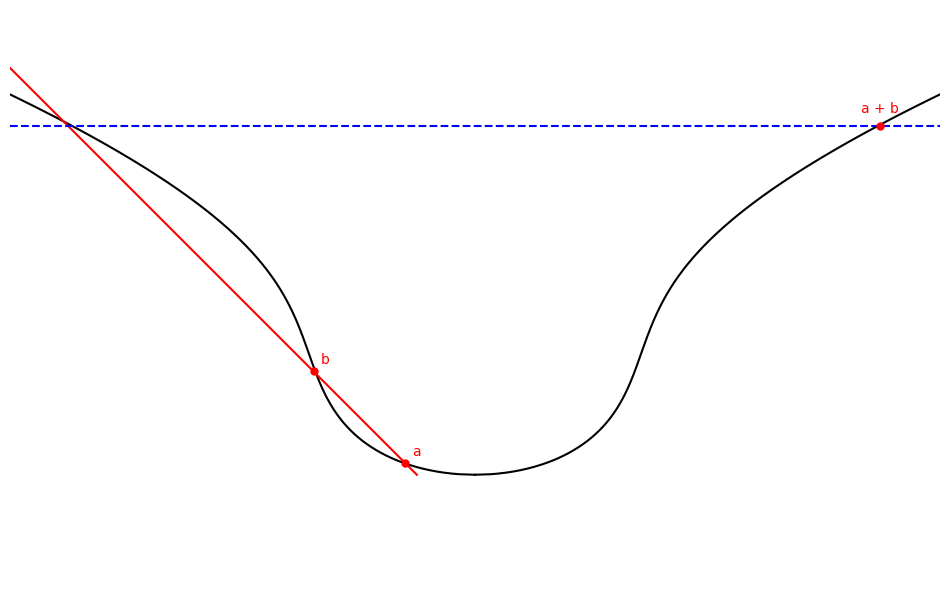

In [ ]:
# @title Grupa inna niż mnożenie na okręgu?

a = 1
b = 2

y_vals = np.linspace(-1.5, 3, 1000)
rhs = y_vals**3 + a * y_vals + b

valid_indices = rhs >= 0
y_valid = y_vals[valid_indices]
x_valid = np.sqrt(rhs[valid_indices])

x_curve_pos = x_valid
x_curve_neg = -x_valid
y_curve = y_valid

plt.figure(figsize=(12, 12))

plt.plot(x_curve_pos, y_curve, color='black')
plt.plot(x_curve_neg, y_curve, color='black')

plt.plot([-4, -0.5], [2.5, -1], color='red')
plt.plot([-4, 4], [2, 2], '--', color='blue')

#for i, (x, y) in enumerate(zip(x_points_annots, y_points_annots)):
#    plt.text(x, y, str(i), color='black', fontsize=10, ha='center', va='center')
plt.text(-0.5, -0.8, 'a', color = 'red', fontsize=10, ha='center', va='center' )
plt.plot(-0.6, -0.9, 'o', color='red', markersize=5)
plt.text(-1.29, -0.01, 'b', color = 'red', fontsize=10, ha='center', va='center' )
plt.plot(-1.381, -0.11, 'o', color='red', markersize=5)
plt.text(3.48, 2.15, 'a + b', color = 'red', fontsize=10, ha='center', va='center' )
plt.plot(3.48, 2, 'o', color='red', markersize=5)

#plt.plot([-5, 0, 5], [-1.5, -1.5, -1.5], color='black')

plt.xlim(-4, 4)
plt.ylim(-2, 3)
plt.gca().set_aspect('equal', adjustable='box')
plt.axis('off')
plt.show()


# Zadania
1. Należy utworzyć trzy zespoły: A, B i C. Niech A i B wygenerują klucze prywatne i publiczne. Następnie udostępnią wszystkim klucze publiczne. Lider grupy B zakoduje tajną wiadomość dla grupy A (np. swoje ulubione danie), a następnie grupa B zaszyfruje wiadomość i wyśle do wszystkich. Grupa A postara się odczytać zakodowaną wiadomość. W tym czasie, grupa C podejmie próby złamania szyfru lub zdobycia kluczy prywatnych, ewentualnie przechwycenia jeszcze nie zaszyfrowanej wiadomości.

2. Każda osoba generuje swój klucz publiczny i zapisuje na kartce (warto się też podpisać). Następnie uczestnicy zajęć wymieniają się kartkami. Teraz należy zaszyfrować dla właściciela kartki jedno słowo korzystając z matrycy w sekcji "Kalkulatory do zadań" i algorytmu ElGamal.

3. Kartki z zadania 2. wracają do właścicieli, którzy podejmują próbę odszyfrowania wiadomości.

Poniżej znadują się proste programy, które ułatwią wykonanie zdań.

In [ ]:
# @title Tajna wiadomość
print('____________________________________________________________________________________________________________________________')
print('\n')

text = input('Podaj wiadomość: ')
print('\n')

max_len = 0
for i in text:
  if len(str(ord(i))) > max_len:
    max_len = len(str(ord(i)))

print('____________________________________________________________________________________________________________________________')
print('\n')

____________________________________________________________________________________________________________________________


Podaj wiadomość: Test


____________________________________________________________________________________________________________________________




In [ ]:
# @title Generowanie kluczy

print('____________________________________________________________________________________________________________________________')
print('\n')

many_keys = input('Czy chcesz wygenerować dwa klucze? (Tak/Nie): ')
many_keys = many_keys.lower()

print('\n')

print('Sugestia rzędu grupy: 10006')

prime_group = input('Podaj rząd grupy szyfrującej: ')
prime_group = str(int(prime_group) + 1)
print('\n')

stop_1 = True
stop_2 = True

while stop_1 | stop_2:
  while stop_1:
    if len(prime_group) < max_len + 1:
      print(f'Rząd grupy szyfrującej powinien być taką liczbą {max_len + 1}-cyfrową p, że p + 1 jest liczbą pierwszą.')
      prime_group = input('Podaj odpowiednią liczbę: ')
      prime_group = str(int(prime_group) + 1)
      break
    else:
      stop_1 = False


  while stop_2:
    for i in range(2, int(np.sqrt(int(prime_group))) + 1):
      if int(prime_group) % int(i) == 0:
        print('Rząd grupy szyfrującej powinien być taką liczbą p, że p + 1 jest liczbą pierwszą.')
        prime_group = input('Podaj odpowiednią liczbę: ')
        prime_group = str(int(prime_group) + 1)
        break
    else:
      stop_2 = False

prime_P = input('Podaj liczbę g (druga część klucza publicznego): ')

prime_P = str(int(prime_P) % int(prime_group))

prime_P = int(prime_P)
while not is_primitive_root(prime_P, int(prime_group), rozklad_na_czynniki_pierwsze(int(prime_group) - 1)):
  prime_P = (prime_P + 1) % int(prime_group)
prime_P = str(prime_P)

private_key_a_finite_group = input('Podaj klucz prywatny osoby A: ')
print('\n')
private_key_a_finite_group = str(int(private_key_a_finite_group) % int(prime_group))

if many_keys == "tak":
  private_key_b_finite_group = input('Podaj klucz prywatny osoby B: ')
  print('\n')
  private_key_b_finite_group = str(int(private_key_b_finite_group) % int(prime_group))

print(f'Klucz publiczny osoby A: {prime_group}-{prime_P}-{(int(prime_P)**int(private_key_a_finite_group)) % int(prime_group)}')
print(f'Klucz prywatny osoby A: {private_key_a_finite_group}')
print('\n')
if many_keys == "tak":
  print(f'Klucz publiczny osoby B: {prime_group}-{prime_P}-{(int(prime_P)**int(private_key_b_finite_group)) % int(prime_group)}')
  print(f'Klucz prywatny osoby B: {private_key_b_finite_group}')
  print('\n')

public_key_a_group = f'{prime_group}-{prime_P}-{(int(prime_P)**int(private_key_a_finite_group)) % int(prime_group)}'
if many_keys == "tak":
  public_key_b_group = f'{prime_group}-{prime_P}-{(int(prime_P)**int(private_key_b_finite_group)) % int(prime_group)}'

print('____________________________________________________________________________________________________________________________')
print('\n')

In [ ]:
# @title Szyfrowanie
print('____________________________________________________________________________________________________________________________')
print('\n')

text_split = list(set(list(text)))

#####################

max_len = 0
encrypted_text = ''
for i in text:
  encrypted_text += str(ord(i)) + '-'
  if len(str(ord(i))) > max_len:
    max_len = len(str(ord(i)))

#####################

prep_to_encrypt = encrypted_text[:-1]
print('\n')

#####################

public_key_a = input('Podaj klucz publiczny osoby A: ')
print('\n')
private_key_b = input('Podaj klucz prywatny osoby B: ')
print('\n')
prime_group_here = public_key_a.split('-')[0]

encrypt = prep_to_encrypt.split('-')

encrypted_message = []

for i in encrypt:
  k = random.randint(1, int(prime_group_here))
  element1 = (int(public_key_a.split('-')[1]) ** k) % int(prime_group_here)
  encrytption_key = (element1**int(private_key_b)) % int(prime_group_here)
  element2 = str((int(i) * encrytption_key) % int(prime_group_here))
  encrypted_message.append(f'{element1}_{element2}')

print('\n')
full_encrypted_message = ''
for i in encrypted_message:
  full_encrypted_message += i + '-'

full_encrypted_message = full_encrypted_message[:-1]
print('Zaszyfrowana wiadomość: ')
print(full_encrypted_message)

print('____________________________________________________________________________________________________________________________')
print('\n')

In [ ]:
# @title Deszyfrowanie

print('____________________________________________________________________________________________________________________________')
print('\n')

answer = input('Pobrać zaszyfrowaną wiadomość z poprzedniego wywołania? (Tak/Nie): ')
print('\n')

if answer == 'Tak':
  encrypt = full_encrypted_message.split('-')
else:
  custom_encrypt = input('Podaj zaszyfrowaną wiadomość: ')
  encrypt = custom_encrypt.split('-')

print('\n')


public_key_b = input('Podaj klucz publiczny osoby B: ')
print('\n')
private_key_a = input('Podaj klucz prywatny osoby A: ')


decrypted_message = []

for i in encrypt:
  encrytption_key = (int(i.split('_')[0])**int(private_key_b)) % int(prime_group_here)
  inv_encrytption_key = (encrytption_key**(int(prime_group_here) - 2)) % int(prime_group_here)
  element = str((int(i.split('_')[1]) * inv_encrytption_key) % int(prime_group_here))
  decrypted_message.append(f'{element}')

print('\n')
full_decrypted_message = ''
for i in decrypted_message:
  full_decrypted_message += i + '-'

prep_to_decrypt = full_decrypted_message[:-1]

message = ''
for i in prep_to_decrypt.split('-'):
  message += chr(int(i))

print('\n')
print('Odszyfrowana wiadomość: ' + message)

print('____________________________________________________________________________________________________________________________')
print('\n')


# Kalkulatory do zadań


In [ ]:
# @title Matryca
alphabet = [
        'A', 'Ą', 'B', 'C', 'Ć', 'D', 'E', 'Ę', 'F',
        'G', 'H', 'I', 'J', 'K', 'L', 'Ł', 'M', 'N',
        'Ń', 'O', 'Ó', 'P', 'Q', 'R', 'S', 'Ś', 'T',
        'U', 'V', 'W', 'X', 'Y', 'Z', 'Ź', 'Ż', ' '
    ]

space = ' |  '

line1 = '|  '
for i in alphabet[:18]:
  line1 += i + space
print(line1)

space = ' | '

line2 = '| '
for i in range(10, 28):
  line2 += str(i) + space
print(line2)

break_line = ''
for i in range(30 * 3 + 1):
  break_line += '-'

print(break_line)

space = ' |  '

line4 = '|  '
for i in alphabet[18:]:
  line4 += i + space
print(line4)

space = ' | '

line5 = '| '
for i in range(28, 28 + 18):
  line5 += str(i) + space
print(line5)




In [ ]:
# @title Kalkulator potęgowania modulo

print('____________________________________________________________________________________________________________________________')
print('\n')
print('Gdy chcesz zakończyć, to zamiast podstawy potęgi wpisz "stop".')
print('\n')
mod_p = input('Podaj rząd grupy skończonej: ')
print('\n')

number = 1
while number != 'stop':
  number = input('Podaj podstawę potęgi: ')
  if number.lower() == 'stop':
    break
  degree = input('Podaj wykładnik potęgi: ')
#  mod_p = input('Podaj rząd grupy skończonej: ')
  print('\n')
  print(f'Wynik: {(int(number)**int(degree)) % (int(mod_p) + 1)}')
  print('\n')
print('____________________________________________________________________________________________________________________________')
print('\n')


In [ ]:
# @title Kalkulator mnożenia modulo
print('____________________________________________________________________________________________________________________________')
print('\n')
print('Gdy chcesz zakończyć, to zamiast pierwszego czynnika wpisz "stop".')
print('\n')
mod_p = input('Podaj rząd grupy skończonej: ')
print('\n')

number = 1
while number != 'stop':
  number = input('Podaj pierwszy czynnik: ')
  if number.lower() == 'stop':
    break
  degree = input('Podaj drugi czynnik: ')
#  mod_p = input('Podaj rząd grupy skończonej: ')
  print('\n')
  print(f'Wynik: {(int(number)*int(degree)) % (int(mod_p) + 1}')
  print('\n')
print('____________________________________________________________________________________________________________________________')
print('\n')
